<a href="https://colab.research.google.com/github/hemanthcs34/ML-lab/blob/main/bayseain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

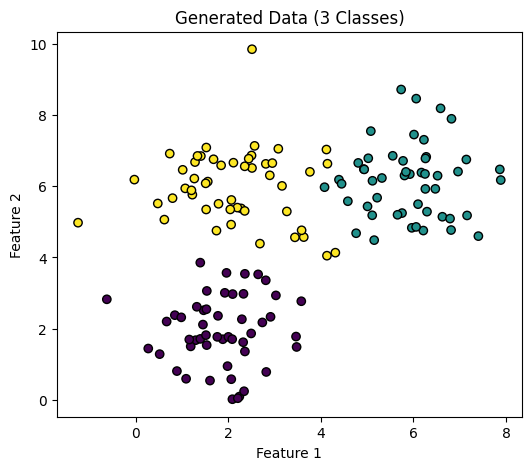

/tmp/ipython-input-2309999015.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(norm_const * result)


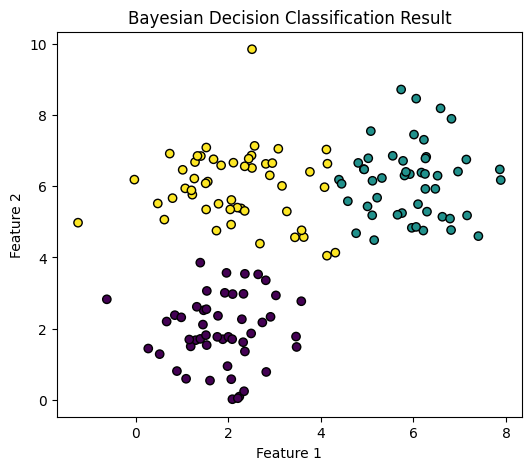

✅ Classification Accuracy: 99.33%

Means of each class:
Class 0: [1.86432437 1.9279826 ]
Class 1: [5.90454712 6.14006205]
Class 2: [2.12894675 6.00084575]

Priors of each class:
Class 0: 0.33
Class 1: 0.33
Class 2: 0.33

Done! Bayesian Decision Theory implemented successfully.


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


X, y = make_blobs(
    n_samples=150,
    centers=[[2, 2], [6, 6], [2, 6]],
    cluster_std=[1.0, 1.0, 1.0],
    random_state=42
)


plt.figure(figsize=(6,5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Generated Data (3 Classes)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

def gaussian_pdf(x, mean, cov):
    size = len(x)
    det = np.linalg.det(cov)
    norm_const = 1.0 / (np.power((2*np.pi), float(size)/2) * np.sqrt(det))
    x_mu = np.matrix(x - mean)
    inv = np.linalg.inv(cov)
    result = np.exp(-0.5 * (x_mu * inv * x_mu.T))
    return float(norm_const * result)

classes = np.unique(y)
means, covariances, priors = [], [], []

for c in classes:
    X_c = X[y == c]
    means.append(np.mean(X_c, axis=0))
    covariances.append(np.cov(X_c.T))
    priors.append(len(X_c) / len(X))

def classify_bayesian(x):
    posteriors = []
    for i in range(len(classes)):
        likelihood = gaussian_pdf(x, means[i], covariances[i])
        posterior = likelihood * priors[i]
        posteriors.append(posterior)
    return np.argmax(posteriors)


predictions = np.array([classify_bayesian(sample) for sample in X])

plt.figure(figsize=(6,5))
plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='viridis', edgecolor='k')
plt.title("Bayesian Decision Classification Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

accuracy = np.mean(predictions == y)
print(f"✅ Classification Accuracy: {accuracy * 100:.2f}%")

print("\nMeans of each class:")
for i, mean in enumerate(means):
    print(f"Class {i}: {mean}")

print("\nPriors of each class:")
for i, prior in enumerate(priors):
    print(f"Class {i}: {prior:.2f}")

print("\nDone! Bayesian Decision Theory implemented successfully.")


/tmp/ipython-input-2309999015.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(norm_const * result)


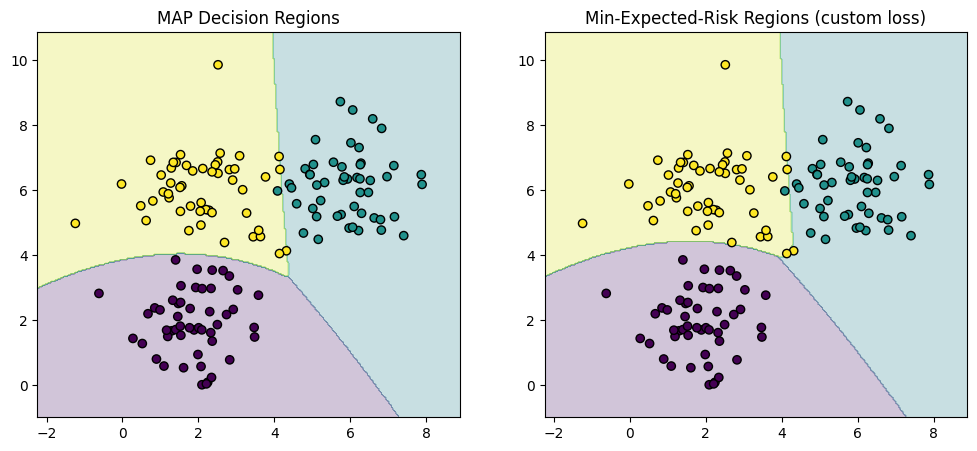

In [2]:
# ---------- Decision boundary + Min-risk visualization ----------
import numpy as np
import matplotlib.pyplot as plt

# grid limits
x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 300),
                       np.linspace(x2_min, x2_max, 300))
grid = np.column_stack([xx1.ravel(), xx2.ravel()])

# compute unnormalized posterior for each class on grid
unnorm = np.zeros((grid.shape[0], len(classes)))
for i in range(len(classes)):
    like = np.array([gaussian_pdf(pt, means[i], covariances[i]) for pt in grid])
    unnorm[:, i] = like * priors[i]

# MAP decision
map_pred = np.argmax(unnorm, axis=1).reshape(xx1.shape)

# Example loss matrix (decisions are rows, true classes are cols)
# Here we purposely penalize predicting class 2 when true class 0 heavily:
L = np.array([[0.0, 1.0, 1.0],
              [1.0, 0.0, 1.0],
              [5.0, 1.0, 0.0]])

# Compute normalized posteriors
evidence = unnorm.sum(axis=1, keepdims=True)
post = unnorm / evidence  # shape (Ngrid, K)

# Compute expected risk for each decision for each grid point
risks = np.dot(post, L.T)  # shape (Ngrid, K) ; risk of deciding i given posteriors
risk_pred = np.argmin(risks, axis=1).reshape(xx1.shape)

# Plot MAP regions
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.contourf(xx1, xx2, map_pred, alpha=0.25)
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k')
plt.title("MAP Decision Regions")
plt.subplot(1,2,2)
plt.contourf(xx1, xx2, risk_pred, alpha=0.25)
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k')
plt.title("Min-Expected-Risk Regions (custom loss)")
plt.show()


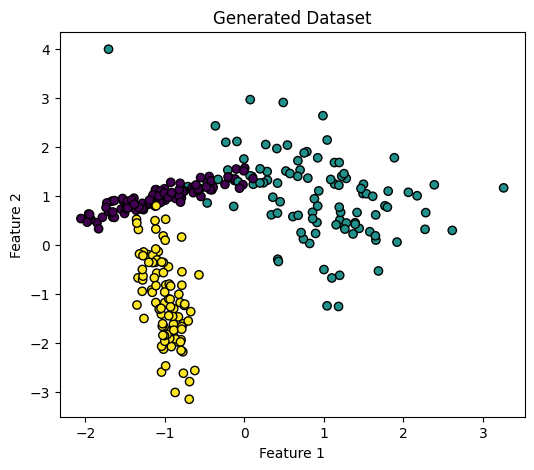

✅ Accuracy: 0.9222222222222223

Confusion Matrix:
 [[25  2  0]
 [ 2 36  0]
 [ 3  0 22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88        27
           1       0.95      0.95      0.95        38
           2       1.00      0.88      0.94        25

    accuracy                           0.92        90
   macro avg       0.93      0.92      0.92        90
weighted avg       0.93      0.92      0.92        90



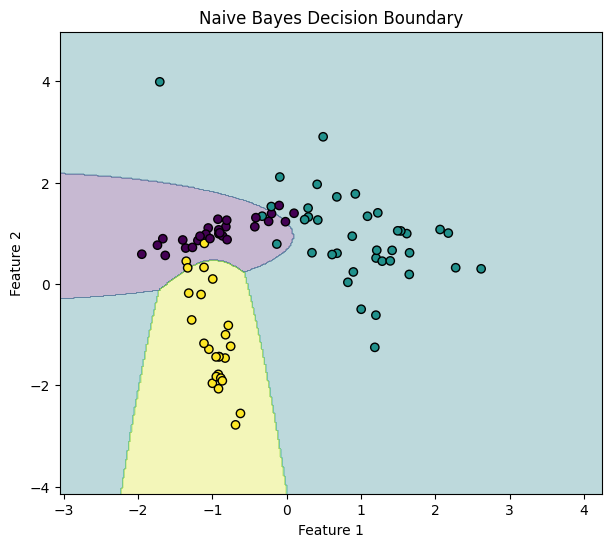

In [3]:
# STEP 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# STEP 2: Generate synthetic dataset
# We’ll make 2D data (two features) so we can visualize easily
X, y = make_classification(
    n_samples=300,     # total points
    n_features=2,      # number of features
    n_informative=2,   # both features are useful
    n_redundant=0,     # no useless features
    n_clusters_per_class=1,
    n_classes=3,       # 3 distinct classes
    random_state=42
)

# STEP 3: Visualize dataset
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', edgecolor='k')
plt.title("Generated Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# STEP 4: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# STEP 5: Initialize Naive Bayes model (Gaussian)
model = GaussianNB()

# STEP 6: Train the model
model.fit(X_train, y_train)

# STEP 7: Predict on test data
y_pred = model.predict(X_test)

# STEP 8: Evaluate the model
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# STEP 9: Visualize decision boundary
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(7,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolor='k', cmap='viridis')
plt.title("Naive Bayes Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()



First 5 rows of generated dataset:
   Feature1  Feature2  Class
0  1.764052  0.400157      0
1  0.978738  2.240893      0
2  1.867558 -0.977278      0
3  0.950088 -0.151357      0
4 -0.103219  0.410599      0

Accuracy on test set: 0.9
Confusion Matrix:
 [[29  2]
 [ 4 25]]

New Sample Prediction:
Predicted Class: 1
Probability for each class: [0.29446825 0.70553175]


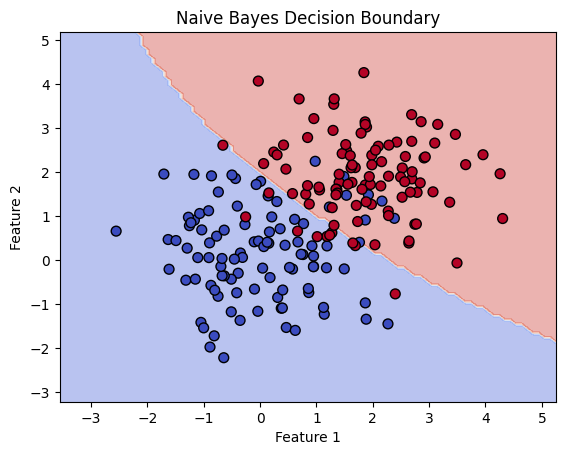

In [4]:
# =========================
# Bayesian Decision Theory using Naive Bayes
# Complete Single Code
# =========================

# Step 0: Install packages (uncomment if running first time)
# !pip install numpy pandas scikit-learn matplotlib

# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Step 2: Generate synthetic dataset
np.random.seed(0)  # For reproducibility
n_samples = 100

# Class 0: mean=0
X_class0 = np.random.normal(loc=0.0, scale=1.0, size=(n_samples, 2))
# Class 1: mean=2
X_class1 = np.random.normal(loc=2.0, scale=1.0, size=(n_samples, 2))

# Combine data
X = np.vstack((X_class0, X_class1))
y = np.array([0]*n_samples + [1]*n_samples)

# Optional: Convert to DataFrame for visualization
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Class'] = y
print("First 5 rows of generated dataset:")
print(df.head())

# Step 3: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Step 5: Predict on test set
y_pred = nb_model.predict(X_test)

# Step 6: Evaluate model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("\nAccuracy on test set:", accuracy)
print("Confusion Matrix:\n", cm)

# Step 7: Predict on new data
new_sample = np.array([[1.0, 1.5]])
predicted_class = nb_model.predict(new_sample)
predicted_prob = nb_model.predict_proba(new_sample)
print("\nNew Sample Prediction:")
print("Predicted Class:", predicted_class[0])
print("Probability for each class:", predicted_prob[0])

# Step 8: Visualize decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = nb_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Naive Bayes Decision Boundary")
plt.show()

